# Задачи 1, 2, 3
[Задача 1](hw-2-2-1-1.pdf)  
[Задача 2](hw-2-2-1-2.pdf)  
[Задача 3](hw-2-2-1-3.pdf)  

# Задача 5

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import sklearn as sk

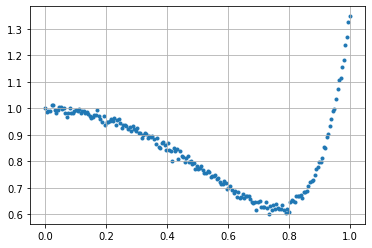

In [39]:
#Зададим неполиноминальную функцию с шумом
size = 200
x = np.linspace(0,1,size)
y = np.exp(-x**2)+x**10+np.random.normal(0, 0.01, x.shape)
fig, ax = plt.subplots()
ax.scatter(x,y, marker = '.')
ax.grid()
plt.show()

In [60]:
MAX_ORDER = 7
polynomial_features = PolynomialFeatures(MAX_ORDER, include_bias=False)

X = polynomial_features.fit_transform(x.reshape(-1,1))
standart_scaler = StandardScaler()
Xn = standart_scaler.fit_transform(X)
# Xn = (X-np.mean(X,axis=0))/(np.std(X,axis=0)+0.1)
Xn = np.hstack((np.ones((Xn.shape[0],1)),Xn))

def make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha):
    grad = 2 * (X @ w - y) @ X + 2 * mu * np.sign(w)
    w -= alpha * grad
    return w

def L1_regression_grad_descent(X, y, w, mu, alpha, steps=2000):
    for _ in range(steps):
        w = make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha)
    return w
        

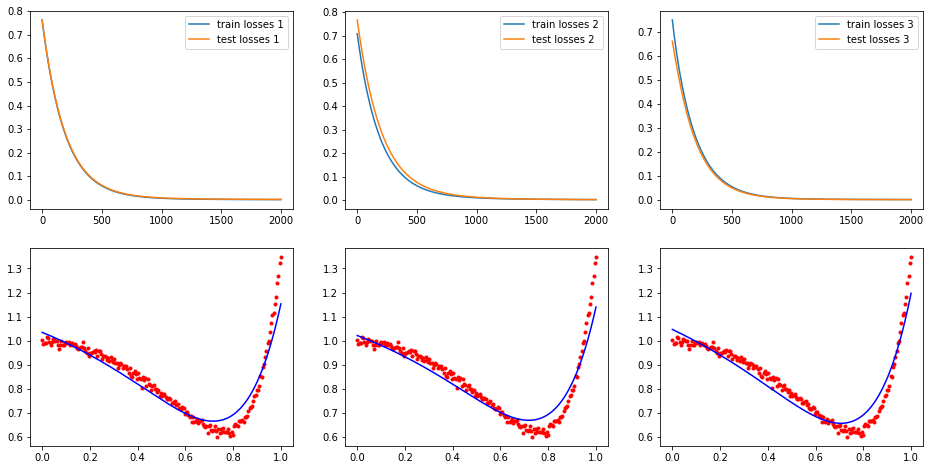

In [66]:
kfold = KFold(n_splits=3, shuffle=True)
n = 0
steps = 2000
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))


for train, test in kfold.split(Xn):
    n += 1
    train_losses = []
    test_losses = []
    w = np.random.normal(0, 0.01, Xn.shape[1])
    for _ in range(steps):
        w = make_L1_regression_grad_descent_iteration(Xn[train], y[train], w, 0.01, 0.00001)
        train_losses.append(mean_squared_error(Xn[train] @ w, y[train]))
        test_losses.append(mean_squared_error(Xn[test] @ w, y[test]))
        
    axs[0, n-1].plot(np.arange(steps), train_losses, label=f"train losses {n}")
    axs[0, n-1].plot(np.arange(steps), test_losses, label=f"test losses {n}")
    axs[0, n-1].legend()
    axs[1, n-1].scatter(x, y, color="r", marker = '.')
    axs[1, n-1].plot(x, Xn @ w, color="b")


Помытаемся изменить некоторые параметы

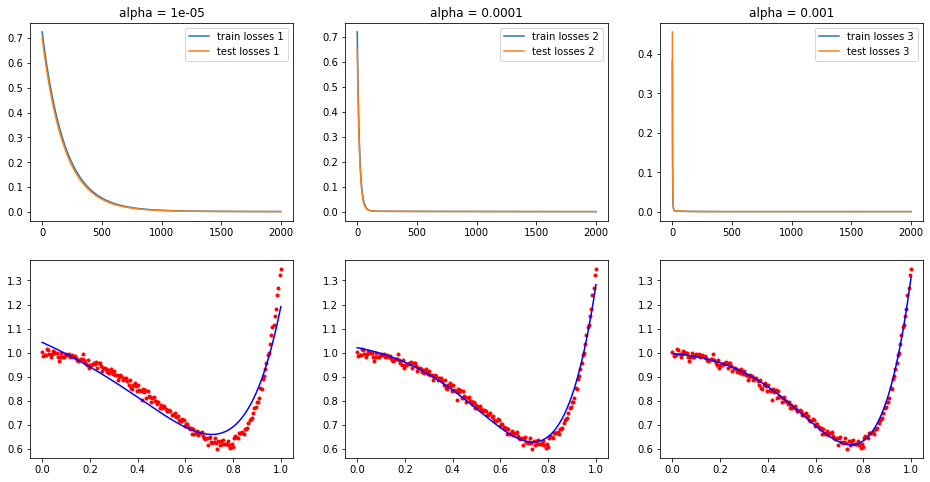

In [70]:
kfold = KFold(n_splits=3, shuffle=True)
n = 0
steps = 2000
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

alpha = [0.00001, 0.0001, 0.001]

for train, test in kfold.split(Xn):
    n += 1
    train_losses = []
    test_losses = []
    w = np.random.normal(0, 0.01, Xn.shape[1])
    for _ in range(steps):
        w = make_L1_regression_grad_descent_iteration(Xn[train], y[train], w, 0.01, alpha[n - 1])
        train_losses.append(mean_squared_error(Xn[train] @ w, y[train]))
        test_losses.append(mean_squared_error(Xn[test] @ w, y[test]))
        
    axs[0, n-1].plot(np.arange(steps), train_losses, label=f"train losses {n}")
    axs[0, n-1].plot(np.arange(steps), test_losses, label=f"test losses {n}")
    axs[0, n-1].set_title(f"alpha = {alpha[n - 1]}")
    axs[0, n-1].legend()
    axs[1, n-1].scatter(x, y, color="r", marker = '.')
    axs[1, n-1].plot(x, Xn @ w, color="b")


с увеличением значения alpha растёт быстрота обучения. Но при дальшейшем увеличении появляется расходимость  
Видим, что скорость обучения alpha = 0.001 подходит для нашей задачи

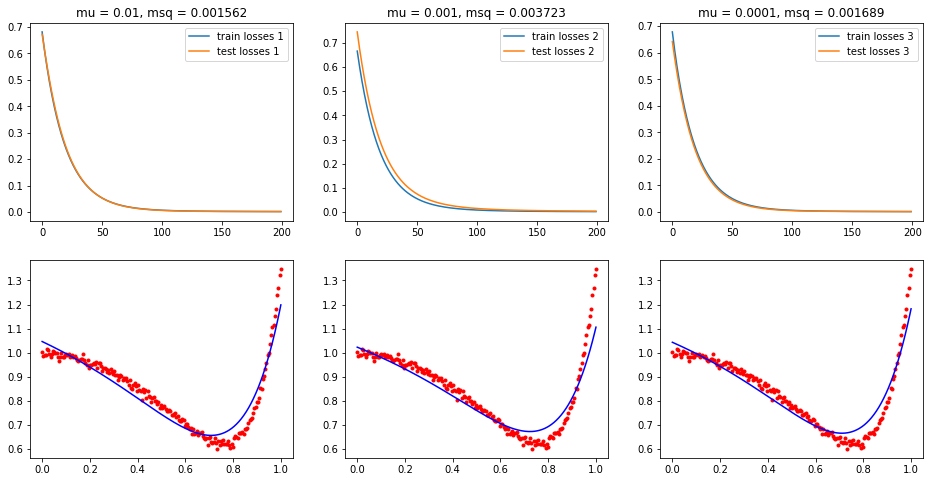

In [88]:
kfold = KFold(n_splits=3, shuffle=True)
n = 0
steps = 200
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

mu = [0.01, 0.001, 0.0001]

for train, test in kfold.split(Xn):
    n += 1
    train_losses = []
    test_losses = []
    w = np.random.normal(0, 0.01, Xn.shape[1])
    for _ in range(steps):
        w = make_L1_regression_grad_descent_iteration(Xn[train], y[train], w, mu[n-1], 0.0001)
        train_losses.append(mean_squared_error(Xn[train] @ w, y[train]))
        test_losses.append(mean_squared_error(Xn[test] @ w, y[test]))
        
    axs[0, n-1].plot(np.arange(steps), train_losses, label=f"train losses {n}")
    axs[0, n-1].plot(np.arange(steps), test_losses, label=f"test losses {n}")
    axs[0, n-1].set_title(f"mu = { mu[n-1]}, msq = {mean_squared_error(Xn[test] @ w, y[test]):.6f}")
    axs[0, n-1].legend()
    axs[1, n-1].scatter(x, y, color="r", marker = '.')
    axs[1, n-1].plot(x, Xn @ w, color="b")

Уменьшение mu не менят заметно ошибку

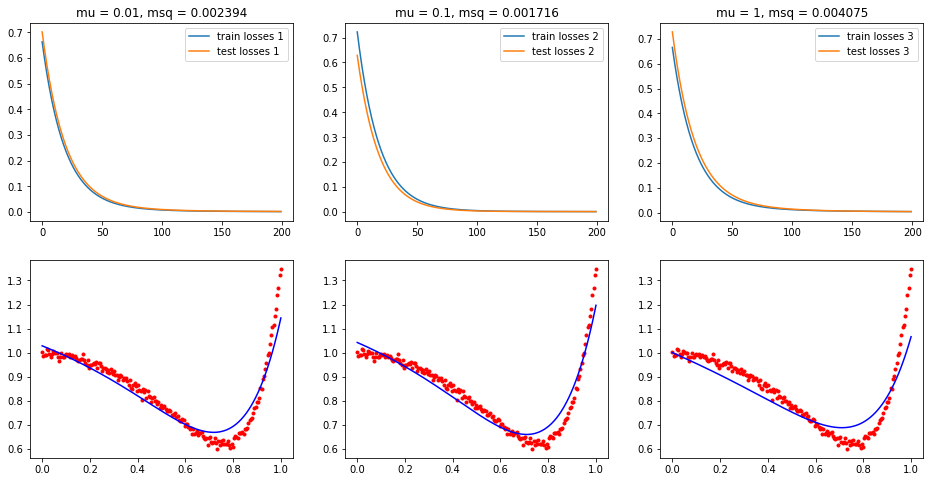

In [91]:
kfold = KFold(n_splits=3, shuffle=True)
n = 0
steps = 200
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

mu = [0.01, 0.1, 1]

for train, test in kfold.split(Xn):
    n += 1
    train_losses = []
    test_losses = []
    w = np.random.normal(0, 0.01, Xn.shape[1])
    for _ in range(steps):
        w = make_L1_regression_grad_descent_iteration(Xn[train], y[train], w, mu[n-1], 0.0001)
        train_losses.append(mean_squared_error(Xn[train] @ w, y[train]))
        test_losses.append(mean_squared_error(Xn[test] @ w, y[test]))
        
    axs[0, n-1].plot(np.arange(steps), train_losses, label=f"train losses {n}")
    axs[0, n-1].plot(np.arange(steps), test_losses, label=f"test losses {n}")
    axs[0, n-1].set_title(f"mu = { mu[n-1]}, msq = {mean_squared_error(Xn[test] @ w, y[test]):.6f}")
    axs[0, n-1].legend()
    axs[1, n-1].scatter(x, y, color="r", marker = '.')
    axs[1, n-1].plot(x, Xn @ w, color="b")

Увеличение mu увеличивает ошибку. Будмем считать mu = 0.01 оптимальным

Построим регрессию на всех данных

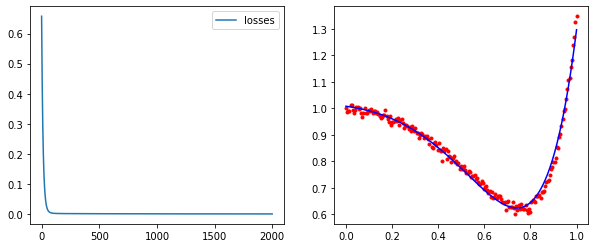

In [104]:
plt.figure(figsize=(10, 4))
losses = []
steps = 2000
w = np.random.normal(0, 0.01, Xn.shape[1])
for _ in range(steps):
    w = make_L1_regression_grad_descent_iteration(Xn, y, w, 0.01, 0.0001)
    losses.append(mean_squared_error(Xn @ w, y))

plt.subplot(121)
plt.plot(np.arange(steps), losses, label="losses")
plt.legend()
plt.subplot(122)
plt.scatter(x, y, color="r", marker = '.')
plt.plot(x, Xn @ w, color="b")
plt.show()